<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

# Introduction to Machine Learning and Linear Regression
This notebook provides an overview of machine learning, linear regression and supervised machine learning.

# Table of Contents
[Python Libraries in this Notebook](#Python-Libraries-in-this-Notebook)

[Machine Learning](#Machine-Learning)

[Supervised Machine Learning](#Supervised-Machine-Learning)

[Common Pitfalls and Recommended Practices](#Common-Pitfalls-and-Recommended-Practices)

- [What is Regression Analysis?](#What-is-Regression-Analysis?)
- [Why do we use Regression Analysis?](#Why-do-we-use-Regression-Analysis?)
- [Linear Regression (LR)](#Linear-Regression-(LR))
- [Simple Linear Regression](#Simple-Linear-Regression)

[Regression Metrics and Other Models and Methods](#Regression-Metrics-and-Other-Models-and-Methods)

- [Total Sum of Squares](#Total-Sum-of-Squares)
- [Mean Squared Error](#Mean-Squared-Error)
- [Residual Sum of Squares](#Residual-Sum-of-Squares)
- [R-Squared: A Measure of Accuracy](#R-Squared:-A-Measure-of-Accuracy)
- [Least Squares](#Least-Squares)
- [Standard Error of the Model: Generalized](#Standard-Error-of-the-Model:-Generalized)
- [Standard Error of the Model: Simple Linear Regression](#Standard-Error-of-the-Model:-Simple-Linear-Regression)
- [Hypothesis-Testing-Regression-Coefficients](#Hypothesis-Testing-Regression-Coefficients)
- [F-Test (Is At Least One Predictor Useful?)](#F-Test-(Is-At-Least-One-Predictor-Useful?))

[Linear Regression in Python](#Linear-Regression-in-Python)
- [Numpy](#Numpy)
- [scikit-learn (sklearn)](#scikit-learn-(sklearn))
- [StatsModels](#StatsModels)

[Linear Regression Example](#Linear-Regression-Example)
- [Outlier Detection with z-Score](#Outlier-Detection-with-z-Score)

[Linear Regression: Anscombe's Quartet](#Linear-Regression:-Anscombe's-Quartet)

[Multiple Linear Regression](#Multiple-Linear-Regression)

[Regression Example: Advertising Data](#Regression-Example:-Advertising-Data)

- [Questions About the Advertising Data](#Questions-About-the-Advertising-Data)
- [Advertising Data Linear Regression](#Advertising-Data-Linear-Regression)
    - [Interpreting LR Model Coefficients](#Interpreting-LR-Model-Coefficients)
    - [Plotting the Least Squares Line](#Plotting-the-Least-Squares-Line)
    - [How Well Does the Model Fit the data?](#How-Well-Does-the-Model-Fit-the-data?)
    - [Using the Model for Prediction](#Using-the-Model-for-Prediction)


- [Advertising Data Multiple Linear Regression](#Advertising-Data-Multiple-Linear-Regression)
    - [Multiple Linear Regression: SKLearn Library](#Multiple-Linear-Regression:-SKLearn-Library)
    - [Multiple Linear Regression: Statsmodel Library](#Multiple-Linear-Regression:-Statsmodel-Library)

- [Feature Selection](#Feature-Selection)

# Python Libraries in this Notebook
[Return to Table of Contents](#Table-of-Contents)

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.model_selection import train_test_split

# For Hypothesis Testing
import statsmodels.api as sm
import statsmodels.formula.api as smf

# this allows plots to appear directly in the notebook
%matplotlib inline

# Machine Learning
[Return to Table of Contents](#Table-of-Contents)

Application of artificial intelligence, machine learning (AI/ML) and deep learning algorithms refers to the process of applying AI/ML algorithms and model development with the purpose for tasks related to analyzing data, obtaining insights from the data or automate some process. These tasks include supervised machine learnign tasks (e.g., classification task, time series prediction and forecasting), unsupervised machine learnign (e.g., clustering), information retrieval (e.g., using similarity searching), topic modeling (e.g., using LDA to extract insights from text or speech data), network analysis (e.g., visualizing relationship between recordrs), and other AI/ML applications. As part of AI/ML steps the team needs to explore the available data and define if the data can support the final goal. Other ML algorithms include reinforcement learning, and deep learning (e.g., neural networks). 

### Supervised Machine Learning
In supervised ML we want to predict a value or a label from the historical data. For classification problems (i.e., predicting a label), a dataset is divided into two, typically 80% as traning data and 20% as testing data. The model is developed and fitted with the training data. The testing data is then used to verify the performance of the model. Classification tasks use metrics such as accuracy, precision and recall, F1-score, AU-ROC, null accuracy, confustion matrix, sensitivity, specificity, among others to evaluate the model fit and performance. Regression (i.e., predicting a variable) the dataset is not divided to develop the model but use metrics such as R2, adjusted R2, root mean square error (RMSE), mean absolute error (MAE) among others to evaluate the model fit and performance.  

Data considerations and issues that may affect supervised machine learning:
1. Data balance (e.g., are all classes represented)
2. Amount of data. Evaluate if there is enough data for dividing the dataset into training/testing (typically 80/20). Data balance may also be affected by amount of data.
3. Bias: Refers to biases that may be introduced during data collection, processing, sampling, or algorihtm use, and may cause an impact in Ethics (e.g., fairness). 
4. Model fit (over-fitting, under-fitting)
5. Hypothesis testing/hypotheses spaces (i.e., models that can be learned by an algorithm)
6. Model Validation: Cross-validation, performance measures diagnosing over/under fitting
7. Feature Engineering: text, categorical data, binning

Some of these challenges may be addressed by obtaining more data, data cleaning, feature selection, using synthetic/augmented data, undersampling/oversampling, SMOTE, model selection, data sensitivity analysis, and other methods. This class is not meant to discuss all of this in details but you will encounter this during your career and may be good topics to start to explore.

When developing and evaluating a model in supervised ML (e.g., classification) includes the following steps:
- Defining values of the independent variable or variables (x)
- Defining values of the dependent variable or variable to be predicted (y)
- Scaling/normalization if needed
- Train/Test Split (Typically 80/20)
- Fitting the training data to the model
- Calculate predictions using the testing data 
- Calculating model performance metrics
    - For Regression model common metric to measure model fit is R-Squared 
    - For classification model common metrics are  confusion matrix, null-accuracy, sensitivity, specificity, precision, recall, f-measure, true-positive rate, false-positvie rate, etc.)
- Deploy and use the model for predicting. 

### Unsupervised Machine Learning
In unsupervised ML, an algorithm finds patterns in the data without using labeled data for training the model. The unsupervised ML is used to analyze and cluster unlabled dataset, discover similarities, find hidden patters, find outliers, etc. There are various data considerations that may affect unsupervised machine learning and selection of algorithms. These include:
1. Knoweing the shape of clusters will allow deciding which clustering algorithm would be best (e.g., centroid-based, density-based, etc.)
2. Is there overlap between clusters?
3. Do I need to identify outliers?

There are about a dozen clustering algorithms including but not limited to KMeans, DBSCAN, meanshift, OPTICS, etc. The SciKit Learn Library documentation has example on these and other algorithms (https://scikit-learn.org/stable/modules/clustering.html).

Other examples of unsupervised ML algorithms include dimensionality reduction. These are used to create convert a high dimensionality problem into a lower dimensionality problem by creating a lower dimension projection. Example algorihtms include [Principal Component Analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA), [T-distributed Stochastic Neighbor Embedding (TSNE)](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), [singular value decomposition (SVD)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html), among others. With high dimensional data (e.g., text), applying dimensionality reduction (e.g., PCA or TSNE) may improve the performance of AI/ML models.

Other Unsupervised ML References:
- https://machinelearningmastery.com/clustering-algorithms-with-python/

The following figure shows main areas under machine learning.

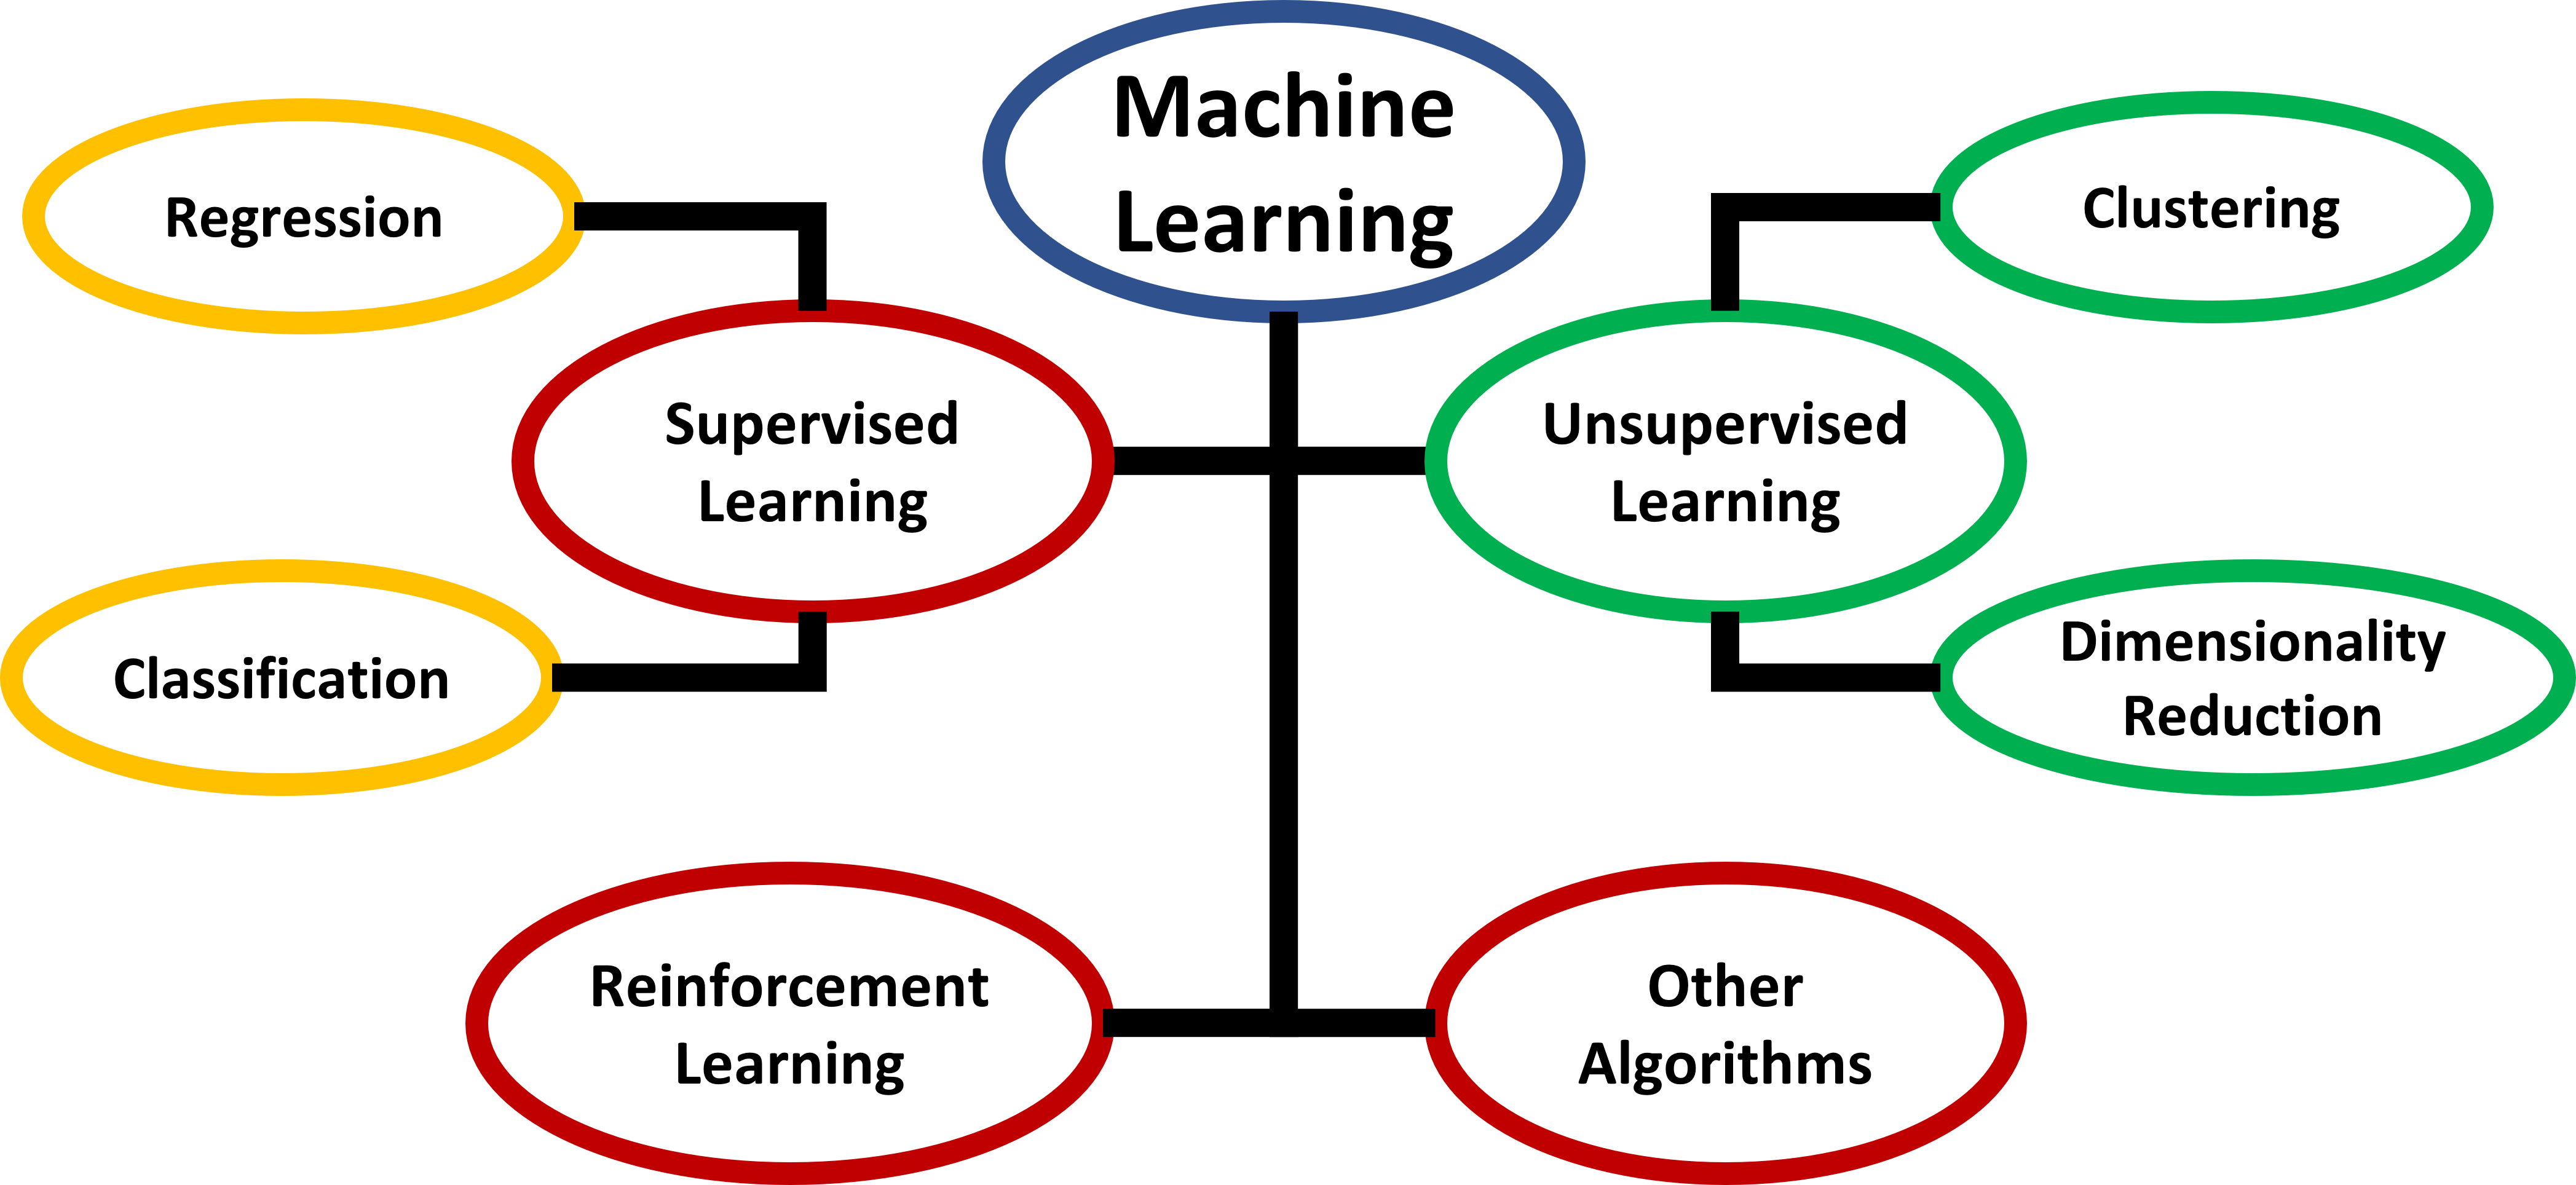

Scikit Learn machine learning library has flowchart guide for choosing estimators and ML algorithms (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). Note that this is only a guide and does not include many other algorithms and methods that are available.
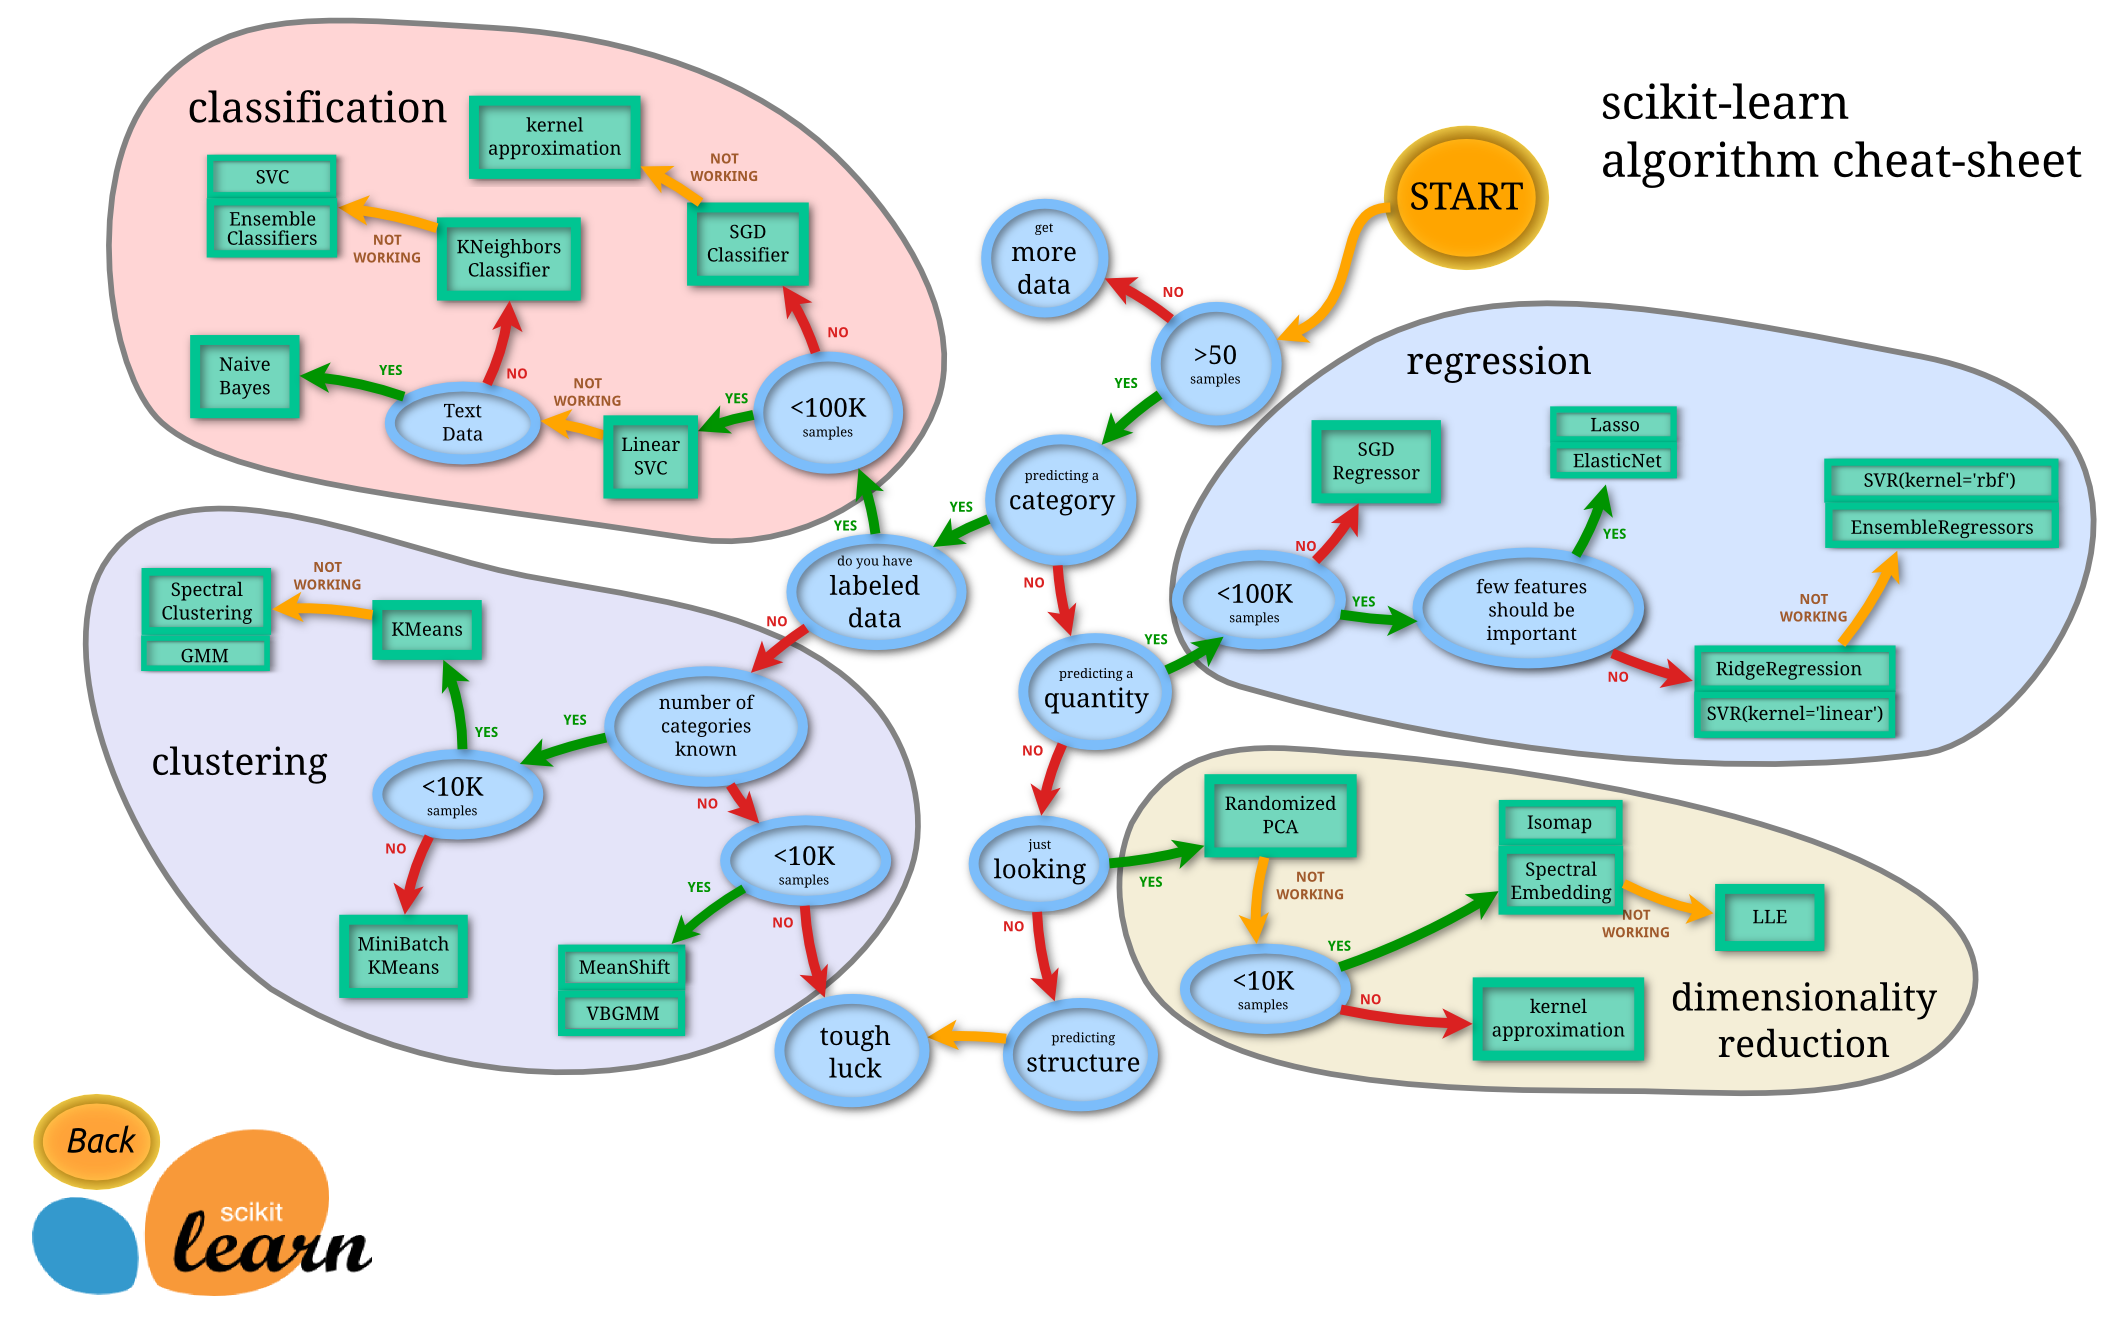

# Common Pitfalls and Recommended Practices
[Return to Table of Contents](#Table-of-Contents)

SciKit Learn User's guide documentation has a good article on common pitfalls and recommended practices when using machine learning algorithms. This article is worth reading and discusses in more detail the topics of inconsistent preprocessing, data leakage, and controlling randomness.

Documentation References:
- https://scikit-learn.org/stable/user_guide.html
- https://scikit-learn.org/stable/common_pitfalls.html

## What is Regression Analysis?
[Return to Table of Contents](#Table-of-Contents)

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). Note that sometimes forecasting and predictive is used interchangeable. Forecasting typically refers to predict a value into the future.

In the figure above, Regressions are under supervised machine learning. Note that regression could also be used in classification tasks where the goal is to predict a categorical value based on other variables (numerical or non-numerical) however it is typically not used for such tasks.

## Why do we use Regression Analysis?
[Return to Table of Contents](#Table-of-Contents)

- To determine the relationship(s) between dependent variable and independent variable(s).
- To determine the strength of impact of multiple independent variable(s) on dependent variable and compare these impacts/effects.
   
These benefits help market researchers, data analysts and data scientists to eliminate and evaluate the best set of variables to be used for building predictive models. Regression is essential for forecasting and predicting a numerical variable based on an independent variable, and time series modelling.

### Linear Regression (LR)
[Return to Table of Contents](#Table-of-Contents)

- LR is one of the most widely known modeling technique. 
- LR is the simplest of the machine learning algorithms.
- In LR, the dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear.
- LR establishes a relationship between dependent variable ($Y$) and one or more independent variables ($X$) using a best fit straight line (also known as regression line).

### Simple Linear Regression
[Return to Table of Contents](#Table-of-Contents)

Simple Linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). We assume a model:
 $$ Y = \beta_0 + \beta_1 X + \epsilon $$
where $\beta_0$ and $\beta_1$ are two unknown constants that represent the <b>intercept</b> and <b>slope</b>, also known as <b>coefficients</b> or <b>parameters</b>, and $\epsilon$ is the error term. Given some estimates $\hat\beta_0$ and $\hat\beta_1$ for the model coefficients, we predict future values using
$$ \hat{y} =  \hat\beta_0 + \hat\beta_1 x$$ 
where $\hat{y}$ indicates a prediction of $Y$ on the basis of $X = x$. The <b>hat</b> symbol denotes an estimated value.

# Regression Metrics and Other Models and Methods
The metrics discussed in this section are exampls of metrics which can be used to measure how well a dataset fits a model. In many cases which metric is used to evaluate how well a model fits the data will depend in the industry.

### Least Squares Linear Regression
[Return to Table of Contents](#Table-of-Contents)

Least Squares is one of the methods used to calculate the linear regression. In the least squares approach, we choose $\hat\beta_0$ and $\hat\beta_1$ to minimize the RSS. The minimizing values can be shown to be:
$$ \hat\beta_1 = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2} $$ 
and
$$\hat\beta_0 = \bar{y} - \hat\beta_1 \bar{x}$$ 
where $\bar{y}$ is mean of $y_i$ values.### Total Sum of Squares
[Return to Table of Contents](#Table-of-Contents)

Total Sum of Squares (TSS) is one of the metrics used to measure how well the model fits teh data. TSS is the sum of squares of the distance between the $y$ values and their mean (i.e., variation of the data):
$$ \mathrm{TSS} = {\sum({y_i}-\bar{y})^2}$$

### R-Squared: A Measure of Accuracy
[Return to Table of Contents](#Table-of-Contents)

R-squared (R$^2$) represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. R$^2$ values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. If the R$^2$ of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

$$ R^2 =1-\frac{\text{RSS}}{\text{TSS}} =1-\frac{\sum({y_i}-\hat{y_i})^2}{\sum(y_i-\bar{y})^2}$$

<br>
Note that R$^2$ explains to what extent the variance of one variable explains the variance of the second variable, whereas correlation explains the strength of the relationship between an independent and dependent variable.

### Mean Squared Error
[Return to Table of Contents](#Table-of-Contents)

Mean Squared Error (MSE) is another metric used which measures the amount of error in the model. IF there is no error, the data fits the linear model perfectly. MSE measures the average of the squares of the errors using the following equation:
$$ \mathrm{MSE} = \frac{1}{N} {\sum({y_i}-\hat{y_i})^2}$$

### Residual Sum of Squares
[Return to Table of Contents](#Table-of-Contents)

The Residual Sum of Squares is used to measures dispersion. Then, $e_i = y_{i}-\hat{y}_{i}$ represents the $i^{th}$ residual. The residual sum of squares (RSS) is the sum of the squares of the error terms (i.e., variation in the error between the data and modeled values) and defined as:
$$ \mathrm{RSS} = {\sum({y_i}-\hat{y_i})^2}$$
The smaller the residual sum of squares, the better your model fits your data and viceversa.

### Standard Error of the Model: Generalized
[Return to Table of Contents](#Table-of-Contents)

The standard error of the model (denoted by $ \mathrm{SE} $) is usually referred to as the standard error of the regression (or sometimes the "standard error of the estimate"). It is another metric of how well the model fits the data.

$$ \mathrm{SE} = \sigma_E \sqrt{\frac{n-1}{n-2}}$$

Each of the two model parameters, the slope and intercept, has its own standard error, which is the estimated standard deviation of the error in estimating it. In general, the term "standard error" means "standard deviation of the error" in whatever is being estimated. The standard error of the intercept is

$$ \mathrm{SE}_{\beta_0} = \frac{\mathrm{SE}}{\sqrt{n}} \sqrt{1+ \left(\frac{\bar{x}}{\sigma_X}\right)^2}$$

This term reflects the additional uncertainty about the value of the intercept that exists in situations where the center of mass of the independent variable is far from zero (in relative terms), in which case the intercept is determined by extrapolation far outside the data range. The standard error of the slope coefficient is given by:

$$ \mathrm{SE}_{\beta_1} = \frac{\mathrm{SE}}{\sqrt{n}} \frac{1}{\sigma_X}$$

Note that 
- $\mathrm{SE}$ is measured in units of $Y$ and $\sigma_X$ is measured in units of $X$, so $\mathrm{SE}_{\beta_1}$ is measured (necessarily) in "units of $Y$ per unit of $X$", the same as ${\beta_1}$ itself. 
- The terms in these equations that involve the variance or standard deviation of $X$ merely serve to scale the units of the coefficients and standard errors in an appropriate way.

Also note that 
- You don′t need to memorize all these equations, but there is one important thing to note: the standard errors of the coefficients are directly proportional to the standard error of the regression and inversely proportional to the square root of the sample size. 
- This means that noise in the data (whose intensity if measured by SE) affects the errors in all the coefficient estimates in exactly the same way, and it also means that 4 times as much data will tend to reduce the standard errors of the all coefficients by approximately a factor of 2, assuming the data is really all generated from the same model, and a really huge of amount of data will reduce them to zero.
- However, more data will not systematically reduce the standard error of the regression. As with the mean model, variations that were considered inherently unexplainable before are still not going to be explainable with more of the same kind of data under the same model assumptions. 
- As the sample size gets larger, the standard error of the regression merely becomes a more accurate estimate of the standard deviation of the noise.

### Standard Error of the Model: Simple Linear Regression
[Return to Table of Contents](#Table-of-Contents)

$$ \mathrm{SE}_{\beta_0} = \sigma_E \sqrt{\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}$$

$$ \mathrm{SE}_{\beta_1} = \frac{\sigma_E}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}}$$

* These standard errors can be used to compute confidence intervals. 
* A 95% confidence interval is defined as a range of values such that with 95% probability, the range will contain the true unknown value of the parameter. 
* There is approximately a 95% chance that the interval
$$ \left[  \hat{\beta_1}- 2 \cdot \mathrm{SE}_{\beta_1},  \hat{\beta_1} + 2 \cdot \mathrm{SE}_{\beta_1} \right] $$
will contain the true value of $\beta_1$ (under a scenario where we got repeated samples like the present sample)


### Hypothesis Testing Regression Coefficients
[Return to Table of Contents](#Table-of-Contents)

Standard errors can also be used to perform hypothesis tests on the coefficients. The most common hypothesis test involves testing the <b>null hypothesis</b> of
 * $H_0$ : There is no relationship between $X$ and $Y$ versus the alternative hypothesis
 * $H_A$ : There is some relationship between $X$ and $Y$.
 
Mathematically, this corresponds to testing
$$ H_0 : \beta_1 = 0 $$
versus
$$ H_1 : \beta_1 \neq 0 $$
since if $\beta_1 =0$ then the model reduces to $Y = \beta_0+\epsilon$, and $X$ is not associated with $Y$.

<br>
To test the null hypothesis, we compute a t-statistic, given by
$$ t = \frac{\beta_1- 0}{\mathrm{SE_{\beta_1}}} $$

This will have a $t$-distribution with $n-2$ degrees of freedom, assuming $\beta_1 = 0$. Using statistical software, it is easy to compute the probability of observing any value equal to |t| or larger. We call this probability the <b>p-value</b>.

- A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.
- Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

### F-Test (Is At Least One Predictor Useful?)
[Return to Table of Contents](#Table-of-Contents)

F-tests are named in honor of Sir Ronald Fisher. Assume n is the number of observations, p is the number of regression parameters. Mean of Squares for Model: <br>  
  $$\mathrm{MSM} =\frac{\sum({\bar{y}}-\hat{y_i})^2}{p-1}$$

Mean of Squares for Error:   
$$\mathrm{MSE} =\frac{\sum({y_i}-\hat{y_i})^2}{n-p}$$


In F-Test, you assume all $\beta$s are equal to zero, except one, and then calculate the MSM/MSE.
- F test score can be anything from 0 to a very large number. There is no theoretical upper limit.
- The F statistic must be used in combination with the p-value when you are deciding if your overall results are significant. 
- If you have a significant result, it doesn’t mean that all your variables are significant. 
- The statistic is just comparing the joint effect of all the variables together.

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, you reject the null hypothesis. Check the F-test if p-value is comparable to 0.05.

# Linear Regression in Python
[Return to Table of Contents](#Table-of-Contents)

There are several Python modules to study Regressions (e.g., linear). Popular options are, numpy, scikit-learn and StatsModels. Numpy methods to calculate the regression coefficients were previously shown.

### Numpy
[Return to Table of Contents](#Table-of-Contents)

The Numpy library has a function used to fit a polynomial of the specified degree to points (x, y). The polyfit function returns a vector of coefficients p that minimises the squared error in the order deg. 

Documentation References:
- https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

### scikit-learn (sklearn)
[Return to Table of Contents](#Table-of-Contents)

Scikit-learn offers a lot of simple, easy to learn Machine Learning algorithms that pretty much only require your data to be organized in the right way before you can run whatever classification, regression, or clustering algorithm you need. It also provides modules for extracting features, processing data, and evaluating models.

Documentation References:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### StatsModels
[Return to Table of Contents](#Table-of-Contents)

The StatsModels module offers statistics and econometric tools that are top of the line and validated against other statistics software like Stata and R. When you need a variety of linear regression models, mixed linear models, regression with discrete dependent variables, and more – StatsModels has options. It also has a syntax much closer to R so, for those who are transitioning to Python, StatsModels is a good choice. 

Documentation References:
- https://www.statsmodels.org/stable/regression.html

# Linear Regression Example
[Return to Table of Contents](#Table-of-Contents)

Assume that we have a simple dataset with $N$ pairs of $x$ and $y$ values, e.g.

$$(x_0, y_0), (x_1, y_1), \cdots ,(x_N, y_N) $$

We want to formulate a linear model to describe the relationship between $x$ and $y$. The linear model can be express as:

$$y = \beta_0 + \beta_1 x$$

For a linear function, $\beta_0$ is the intercept, and $\beta_1$ is the slope. These are two parameters that we want to estimate.

In [2]:
# let's load a sample dataset
# gvh = pd.read_csv("grade_vs_no_of_hours.csv")
gvh = pd.read_csv("./input_data/grade_vs_no_of_hours.csv")
gvh.head()
# Let's hypothesize that the grade is somehow proportional to the number of study hours.

,grade,no_of_hours
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


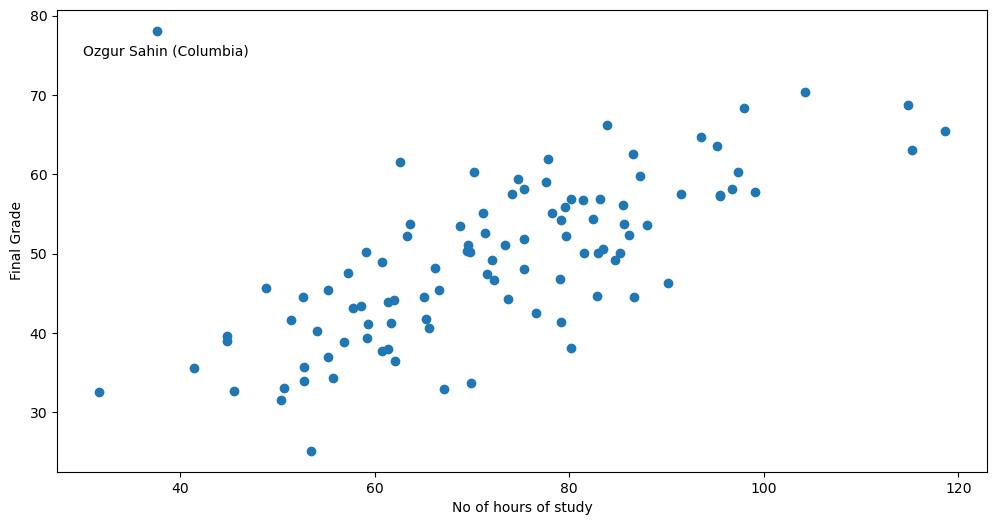

In [3]:
# Let's see what we have
fig = plt.figure(figsize=(12,6))
plt.scatter(gvh.no_of_hours, gvh.grade)
plt.xlabel('No of hours of study')
plt.ylabel('Final Grade')
plt.text(30,75,'Ozgur Sahin (Columbia)')
plt.show()

Numpy has a <code>polyfit</code> function which can determine the coefficients $\beta_0$ and $\beta_1$ for us. We would fit (i.e., train) the model (simple linear regression) with the data. 

Documentation References:
- https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [4]:
Lin_Reg_Coefficients = np.polyfit(x = gvh.no_of_hours, y = gvh.grade, deg = 1)
Lin_Reg_Coefficients
# First element is the coefficient and the second the intercept.

array([ 0.3980811 , 20.43090502])

In [5]:
x = gvh.no_of_hours
# Calculates the values of the linear regression in order to draw it in MatPlotLib
y_prediction = Lin_Reg_Coefficients[0]*x + Lin_Reg_Coefficients[1]

# print the R-squared value for the model (with outlier)
r_squared_woutlier = r2_score(y_true = gvh.grade, y_pred = y_prediction)

Linear Equation: y = 20.430905022700546 + 0.39808109948052073x
R2 value [with outlier]= 0.44383879628968714


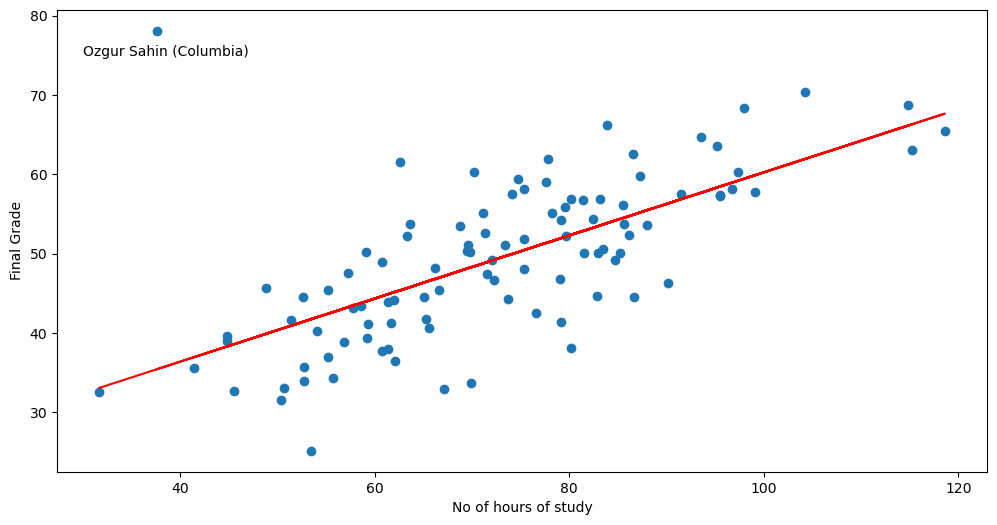

In [6]:
fig = plt.figure(figsize=(12,6))
plt.scatter(gvh.no_of_hours, gvh.grade)
plt.plot(x,y_prediction,'r') # Draws the linear regression as a red line.
plt.xlabel('No of hours of study')
plt.ylabel('Final Grade')
plt.text(30,75,'Ozgur Sahin (Columbia)')

print(f'Linear Equation: y = {Lin_Reg_Coefficients[1]} + {Lin_Reg_Coefficients[0]}x')
print(f'R2 value [with outlier]= {r_squared_woutlier}')

plt.show()
# Note the outlier on the top left.

### Outlier Detection with z-Score
[Return to Table of Contents](#Table-of-Contents)

Recall outlier Detection with Z-Score in the Fundamentals of Statistics for Data Science Notebook. Outliers may skew our data and decrease model accuracy if not addressed.

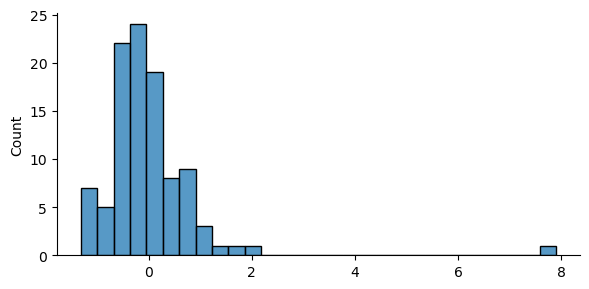

In [7]:
# let’s compute the z-Scores, plot them and see if we can identify any outliers. 
grade_normalized_by_hour = gvh.iloc[:,0].values/gvh.iloc[:,1].values
z_scores_of_grade_normalized_by_hour = st.zscore(grade_normalized_by_hour)
plot = sns.displot(z_scores_of_grade_normalized_by_hour, 
                   kind='hist', height = 3, aspect = 2)
# Note the bar on the right.

In [8]:
# Let's use iloc to filter for the outlier.
gvh.iloc[z_scores_of_grade_normalized_by_hour>2]

,grade,no_of_hours
100,78.1,37.6


In [9]:
# Let's drop the outlier and recalculate the linear regression.
gvh.drop(index=gvh.iloc[z_scores_of_grade_normalized_by_hour > 2].index.tolist(), 
         inplace=True)

In [10]:
Lin_Reg_Coefficients = np.polyfit(gvh.no_of_hours, gvh.grade, 1)
Lin_Reg_Coefficients
# Compare to previous linear regression coefficients ([ 0.3980811 , 20.43090502]).

array([ 0.4526934 , 16.03166437])

In [11]:
x = gvh.no_of_hours
y_prediction = Lin_Reg_Coefficients[0]*x+Lin_Reg_Coefficients[1]

# print the R-squared value for the model
r_squared_no_outlier = r2_score(y_true = gvh.grade, y_pred = y_prediction)

Linear Equation: y = 16.03166436697966 + 0.4526933967031504x
R2 value [with outlier]= 0.5986557915661923


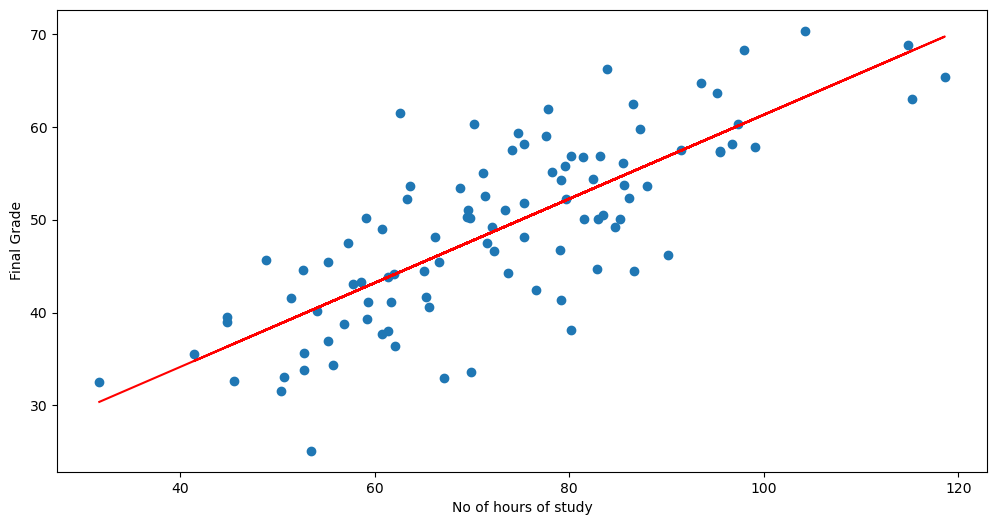

In [12]:
fig = plt.figure(figsize=(12,6))
plt.scatter(gvh.no_of_hours, gvh.grade)
plt.plot(x,y_prediction,'r')
plt.xlabel('No of hours of study')
plt.ylabel('Final Grade')

print(f'Linear Equation: y = {Lin_Reg_Coefficients[1]} + {Lin_Reg_Coefficients[0]}x')
print(f'R2 value [with outlier]= {r_squared_no_outlier}')

plt.show()
# Plot with linear regression and no outlier.

When comparing the coefficients, the first coefficient (i.e., the y-intercept) was reduced while the second coefficient (i.e., slope of the linear regression) increased. By removing the outliers one of the effects is that the data will fit the model better. However, in order to evaluate the model fit and accuracy we would need to calculate other metrics such as R-Squared. 

For the two models above we can observe that when we use the outlier the R-Squared equals 0.44 and when the outlier is removed the R-Squared increases to 0.59. A good value of R2 is highly dependent on the field of study where in some a value of 0.7 or above may be considered a good value while in others a value 0.9 and above may be considered good. More details on R-squared are discussed in the following sections.

In [13]:
print(f'R-Squared with the outlier = {r_squared_woutlier}')
print(f'R-Squared with the NO outlier = {r_squared_no_outlier}')

R-Squared with the outlier = 0.44383879628968714
R-Squared with the NO outlier = 0.5986557915661923


##### Questions
- Can we guess (or forecast) the grade of a student who works for 160 hours in total?
- Do you see a problem (hint what if the student works for 1600 hours??)

In [14]:
x_guess = 160
y_guess = Lin_Reg_Coefficients[0] * x_guess+Lin_Reg_Coefficients[1]
print(y_guess)

88.46260783948372


In [15]:
x_guess = 1600
y_guess = Lin_Reg_Coefficients[0]*x_guess+Lin_Reg_Coefficients[1]
print(y_guess)

740.3410990920203


In [20]:
# Using the input function
x_guess = int(input('Please enter hours of planned study: '))

y_guess = Lin_Reg_Coefficients[0]*x_guess+Lin_Reg_Coefficients[1]
print(f'If you study {x_guess} hours you should get {round(y_guess, 1)} grade.')

Please enter hours of planned study:  122


The x used in the input is outside of the model data. Use a value lower than 120 hours.


#### NOTE:

Linear regression is very useful and powerful but there are certain limits where it could be applied. To determine the limits we can obtain more data or use statistics. <br>

# Linear Regression: Anscombe's Quartet
[Return to Table of Contents](#Table-of-Contents)

This famous dataset was created by statistician Francis Anscombe in 1973. There are four groups each consisting of 11 pairs of x and y coordinates. The quartet has various properties:
- Demonstrate importance of plots
- Very similar statistics
- Show the effects of outliers

Documentation References:
- https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html
- https://seaborn.pydata.org/examples/anscombes_quartet.html

In [21]:
# anscombe = pd.read_csv("anscombes.csv")
anscombe = pd.read_csv("./input_data/anscombes.csv")
anscombe

,xA,yA,xB,yB,xC,yC,xD,yD
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


(3.0, 13.0)

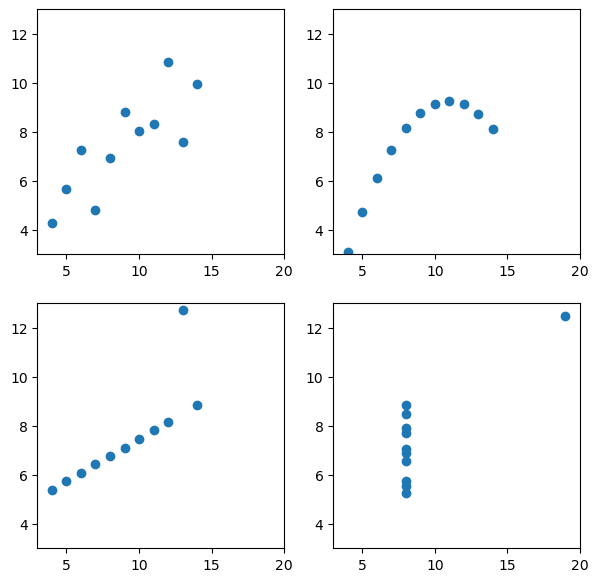

In [22]:
# Let's plot the data.
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(221)
ax1.scatter(anscombe.xA, anscombe.yA)
ax1.set_xlim(3,20)
ax1.set_ylim(3,13)

ax2 = fig.add_subplot(222)
ax2.scatter(anscombe.xB, anscombe.yB)
ax2.set_xlim(3,20)
ax2.set_ylim(3,13)

ax3 = fig.add_subplot(223)
ax3.scatter(anscombe.xC, anscombe.yC)
ax3.set_xlim(3,20)
ax3.set_ylim(3,13)

ax4 = fig.add_subplot(224)
ax4.scatter(anscombe.xD, anscombe.yD)
ax4.set_xlim(3,20)
ax4.set_ylim(3,13)

It looks like these four groups and plots have almost nothing in common! <br>
Let's calculate the statistics and try to fit them with Linear Regression

In [23]:
anscombe.describe()
# Note that the means and the xX and the yY are very similar if not the same.

,xA,yA,xB,yB,xC,yC,xD,yD
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


In [24]:
zA = np.polyfit(x=anscombe.xA, y=anscombe.yA, deg=1)
zB = np.polyfit(x=anscombe.xB, y=anscombe.yB, deg=1)
zC = np.polyfit(x=anscombe.xC, y=anscombe.yC, deg=1)
zD = np.polyfit(x=anscombe.xD, y=anscombe.yD, deg=1)

In [25]:
x = np.arange(0,21) # Values of X 0 to 20 and used to draw the linear regression line.
fxA = zA[0]*x+zA[1] # LR value of Y for xA data.
fxB = zB[0]*x+zB[1] # LR value of Y for xB data.
fxC = zC[0]*x+zC[1] # LR value of Y for xC data.
fxD = zD[0]*x+zD[1] # LR value of Y for xD data.

(3.0, 13.0)

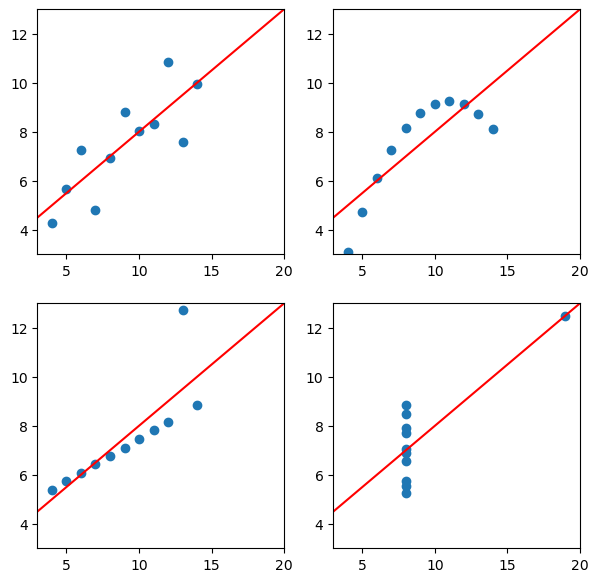

In [26]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(221)
ax1.scatter(anscombe.xA, anscombe.yA) # Scatter plot data.
ax1.plot(x, fxA,'r') # Draws the linear regression line.
ax1.set_xlim(3,20)
ax1.set_ylim(3,13)

ax2 = fig.add_subplot(222)
ax2.scatter(anscombe.xB, anscombe.yB) # Scatter plot data.
ax2.plot(x, fxB,'r') # Draws the linear regression line.
ax2.set_xlim(3,20)
ax2.set_ylim(3,13)

ax3 = fig.add_subplot(223)
ax3.scatter(anscombe.xC, anscombe.yC) # Scatter plot data.
ax3.plot(x, fxC,'r') # Draws the linear regression line.
ax3.set_xlim(3,20)
ax3.set_ylim(3,13)

ax4 = fig.add_subplot(224) 
ax4.scatter(anscombe.xD, anscombe.yD) # Scatter plot data
ax4.plot(x, fxD,'r') # Draws the linear regression line.
ax4.set_xlim(3,20)
ax4.set_ylim(3,13)

Even though these four groups look quite different, the descriptive statistic were the same, and we end up using the same linear regression model to make predictions. This is a simple case where we can determine the issue visually but when there are tens of variables, things will get complicated. We really need to understand distributions, how to characterize them, and how to transform them (when needed). Linear regression is very useful and powerful but there are certain limits where it could be applied. We heavily use statistics to determine these limits.

# Multiple Linear Regression
[Return to Table of Contents](#Table-of-Contents)

In multiple linear regression we want to look at the relationshipe of more than two variables. We have an input vector $X^T=(X_1,...,X_p)$ and want to predict a real-valued output $Y$.The linear regression model has the form:

$$f(X) = \beta_0 + \sum_{j=1}^p {X_j\beta_j}$$

Note that we can also write the above equation in the following form assuming $X_0 = 1$

$$f(X) = \sum_{j=0}^p {X_j\beta_j}$$

 Typically we have a set of training data $(x_1, y_1)...(x_N, y_n)$ from which to estimate the parameters $\beta$. The most popular estimation method is *least squares*, in which we pick $\beta$ to minimize the residual sum of squares, (3.2):
$$ 
\begin{align}
RSS(\beta)&=\sum_{i=1}^N(y_i-f(x_i))^2\\
&=\sum_{i=1}^N(y_i-\sum_{j=0}^p{x_{ij}\beta_j})^2
\end{align}
$$

Let's rewrite $RSS(\beta)$ in matrix form:
$$RSS(\beta)=(\mathbf{y}-\mathbf{X}\beta)^T(\mathbf{y}-\mathbf{X}\beta)$$

Differentiating with respect to $\beta$ we obtain:
$$
\begin{align}
\frac{\partial{RSS}}{\partial\beta} = -2\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta)
\end{align}
$$

Assuming that **X** has full column rank, and hence the second derivative is positive definite:
$$\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta)=0$$

and the unique solution is:
$$\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

The predicted value at an input vector $x_0$ are given by $\hat{f}(x_0)=(1:x_0)^T\hat{\beta}$:

$$\hat{y}=\mathbf{X}\hat{\beta}=\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

The matrix $\mathbf{H}=\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ is sometimes called the "hat" matrix.

# Regression Example: Advertising Data
[Return to Table of Contents](#Table-of-Contents)

Let's take a look at advertising data set, ask some questions about that data, and then use Linear regression to answer those questions.

In [27]:
# read data into a DataFrame
data = pd.read_csv('./input_data/Advertising.csv', 
                   index_col=0)

print(data.shape)
data.head()

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features** (i.e., independent variables)?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio (in thousands of dollars)
- Newspaper: Advertising dollars spent on Newspaper (in thousands of dollars)

What is the **response** (i.e., dependent variable)?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [28]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [29]:
data.corr()
# Highest correlation is TV and Sales. Lowest correlation is Sales and Newspaper.

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

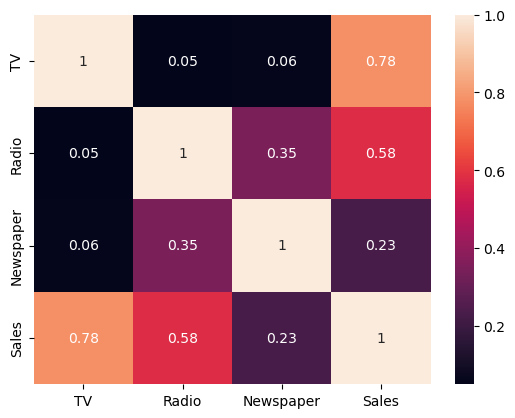

In [30]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [31]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

<Axes: xlabel='Newspaper', ylabel='Sales'>

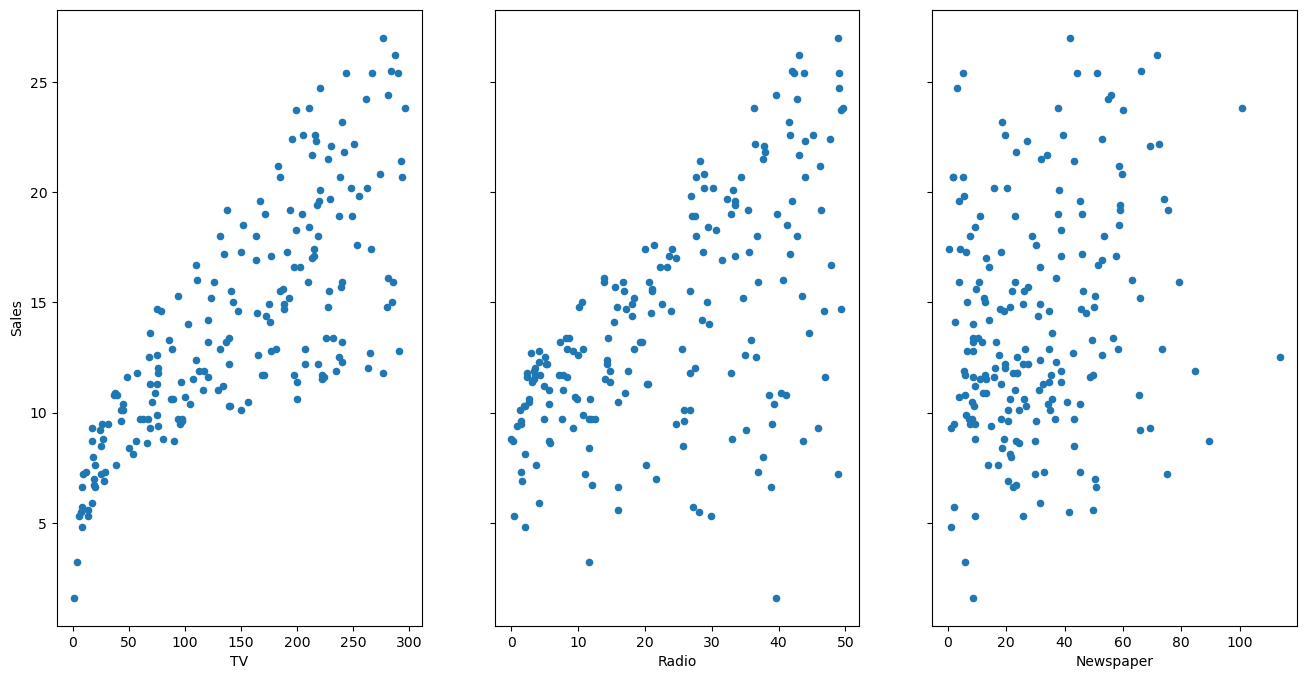

In [32]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

### Questions About the Advertising Data
[Return to Table of Contents](#Table-of-Contents)

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

These general questions might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

In [33]:
print(data.shape)
data.head(3)

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


### Advertising Data Linear Regression
[Return to Table of Contents](#Table-of-Contents)

In [34]:
# create X and y
X = data['TV'].values.reshape(-1,1)
y = data.Sales.values.reshape(-1,1)

# sklearn process steps: (1) import model (see library import Notebook cell), (2) instantiate, (3) fit
lm = LinearRegression() # Instatiating an instance of the model (i.e., linear regression model)
lm.fit(X, y) # Fitting the data to the linear regression model (i.e., also called training the model).

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

[7.03259355]
[[0.04753664]]


In [35]:
# Note this is the shape of the input data.
print(X.shape) # TV values.
print(y.shape) # Sales.

(200, 1)
(200, 1)


In [36]:
y_prediction = lm.intercept_ + lm.coef_ * X # Predicts the values of y of the linear regression for each value of X.

#### Interpreting LR Model Coefficients
[Return to Table of Contents](#Table-of-Contents)

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

In [37]:
# Create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [38]:
# Make predictions for those x values and store them
preds = lm.predict(X_new['TV'].values.reshape(-1,1))
preds

array([[ 7.0658692 ],
       [21.12245377]])

#### Plotting the Least Squares Line
[Return to Table of Contents](#Table-of-Contents)

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

The Linear Regression Equation is: y = 7.03 + 0.05x


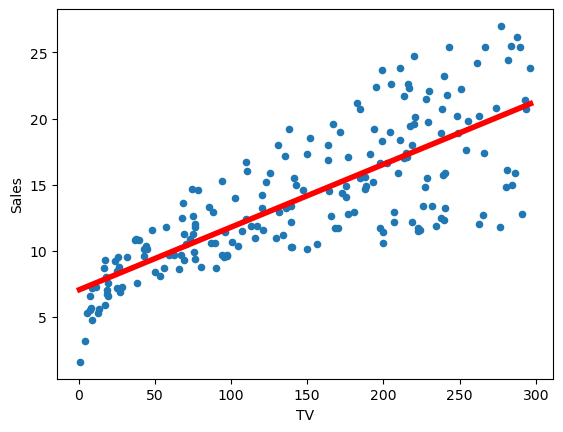

In [39]:
# Scatter plot of the observed data
data.plot(kind='scatter', x='TV', y='Sales')
#plt.scatter(data.TV, data.Sales)

# Plot the least squares line
plt.plot(X_new['TV'].values.reshape(-1,1), preds, c='r', linewidth=4)

print(f'The Linear Regression Equation is: y = {round(lm.intercept_[0], 2)} + {round(lm.coef_[0][0], 2)}x')
plt.show()

#### How Well Does the Model Fit the data?
[Return to Table of Contents](#Table-of-Contents)

Let's calculate the R-squared value for our simple linear model:

In [40]:
# print the R-squared value for the model
r2_score(y, y_prediction)

0.611875050850071

Is that a "good" R-squared value? A good value of R2 is highly dependent on the field of study where in some a value of 0.7 or above may be considered a good value while in others a value 0.9 and above may be considered good. In the case of this data seems to have an exponential behavior and an exponential regression may provide a better model and R2 values.

#### Using the Model for Prediction
[Return to Table of Contents](#Table-of-Contents)

Let's say that there was a new market where the TV advertising spent was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [ ]:
# Manually calculate the prediction
7.032594 + 0.047537*50

Thus, we would predict Sales of **9,409 widgets** in that market.

In [ ]:
# let's create a DataFrame 
X_new = pd.DataFrame({'TV': [50, 100, 150]})
X_new.head()

In [ ]:
# Use the model to make predictions on a new value
X_new['Sales'] = lm.predict(X_new['TV'].values.reshape(-1,1))
X_new

### Advertising Data Multiple Linear Regression
[Return to Table of Contents](#Table-of-Contents)

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times \mathrm{TV} + \beta_2 \times \mathrm{Radio} + \beta_3 \times \mathrm{Newspaper}$

#### Multiple Linear Regression: SKLearn Library

In [ ]:
# Create X and y.
# In this case we are using all of our columns to create the multiple linear regression.
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

lm2 = LinearRegression()
lm2.fit(X, y)

# Print intercept and coefficients
print(lm2.intercept_) # Intercept
print(lm2.coef_) # Coefficients for TV, Radio and Newspaper. 

In [ ]:
y_prediction = lm2.predict(X)
r2_score(y, y_prediction)

The multiple linear regression model has a higher **R-squared** (0.897) than simple linear regression model (i.e., one variable), which means that this model provides a better fit to the data than a model that only includes TV.

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

#### Multiple Linear Regression: Statsmodel Library
This time let's use Statsmodels ordinary Lease squares (OLS) to estimate these coefficients and get some extra info. A lot of the information we have been reviewing piece-by-piece will be available in the model summary output:

References:
- https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [ ]:
# Uses Statsmodels ordinary lease squares (OLS) function.
lm3 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm3.conf_int()

In [ ]:
lm3.summary()
# Provides summary of the model, including statistics and coefficients. 

The Summary table R2 matches the same value of the SKLearn results. However, Statsmodel also provides other statisticis including p-values. What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- Same as with the SKLearn library, **R-squared** (0.897) is higher with the multiple linear regression model than in the simple linear regression model (i.e., one variable), which means that this model provides a better fit to the data than a model that only includes TV.

### Feature Selection
[Return to Table of Contents](#Table-of-Contents)

How do I decide **what features has to be included** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** in this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [ ]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

In [ ]:
lm.summary()

In [ ]:
# Add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

In [ ]:
# Add some non-linearity! Multiplication of TV and Radio.
lm = smf.ols(formula='Sales ~ TV + Radio + TV*Radio', data=data).fit()
lm.rsquared

In [ ]:
lm.summary()

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

Is there a better approach to feature selection? [**Cross-validation.**](https://scikit-learn.org/stable/modules/cross_validation.html) It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

# Notebook End